In [1]:
from tensorflow import keras
keras.__version__

'2.8.0'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
! pip install -q kaggle --upgrade
from google.colab import files

import os, shutil

# Manually upload kaggle json file
! mkdir ~/.kaggle
! cp /content/kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

! kaggle competitions download -c dogs-vs-cats
! unzip dogs-vs-cats.zip -d ./

! unzip train.zip -d ./


# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/content/train'

# The directory where we will
# store our smaller dataset
base_dir = '/content/sample_data/cats_and_dogs_small'
os.makedirs(base_dir, exist_ok=True)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.makedirs(train_cats_dir, exist_ok=True)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.makedirs(train_dogs_dir, exist_ok=True)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.makedirs(validation_cats_dir, exist_ok=True)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.makedirs(validation_dogs_dir, exist_ok=True)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.makedirs(test_cats_dir, exist_ok=True)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.makedirs(test_dogs_dir, exist_ok=True)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: ./train/dog.5499.jpg    
  inflating: ./train/dog.55.jpg      
  inflating: ./train/dog.550.jpg     
  inflating: ./train/dog.5500.jpg    
  inflating: ./train/dog.5501.jpg    
  inflating: ./train/dog.5502.jpg    
  inflating: ./train/dog.5503.jpg    
  inflating: ./train/dog.5504.jpg    
  inflating: ./train/dog.5505.jpg    
  inflating: ./train/dog.5506.jpg    
  inflating: ./train/dog.5507.jpg    
  inflating: ./train/dog.5508.jpg    
  inflating: ./train/dog.5509.jpg    
  inflating: ./train/dog.551.jpg     
  inflating: ./train/dog.5510.jpg    
  inflating: ./train/dog.5511.jpg    
  inflating: ./train/dog.5512.jpg    
  inflating: ./train/dog.5513.jpg    
  inflating: ./train/dog.5514.jpg    
  inflating: ./train/dog.5515.jpg    
  inflating: ./train/dog.5516.jpg    
  inflating: ./train/dog.5517.jpg    
  inflating: ./train/dog.5518.jpg    
  inflating: ./train/dog.5519.jpg    
  inflating: ./train/dog.552.jpg     
  inflating: .

# Using a pre-trained convnet

이 노트북에는 [Python을 사용한 딥 러닝] (https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff)의 5 장 섹션 3에있는 코드 샘플이 포함되어 있습니다. 원본 텍스트에는 훨씬 더 많은 내용, 특히 추가 설명 및 그림이 포함되어 있습니다.이 노트북에서는 소스 코드와 관련 주석 만 찾을 수 있습니다.

----

작은 이미지 데이터 세트를 이용한 딥 러닝에 대한 일반적이고 매우 효과적인 접근 방식은 pretraining 된 네트워크를 활용하는 것입니다. pretraining 된 네트워크는 이전에 대규모 데이터 세트, 일반적으로 대규모 이미지 분류 작업에서 훈련 된 저장된 네트워크입니다. 이 원본
데이터 세트가 충분히 크고 일반적이면 사전 훈련 된 네트워크가 좋은 변수를 변환하는 측면에서 효과적으로 역할을 할 수 있습니다.
새로운 문제는 원래 상황과 완전히 다른 클래스를 포함 할 수 있습니다. 예를 들어, 네트워크를 ImageNet (클래스가 대부분 동물과 일상적인 물체 인 경우)을 사용하고 이 훈련 된 네트워크를 이미지에서 가구 항목 식별에 사용할 수 있습니다.
전통적인 머신러닝 방법들이나 인공신경망과 비교하여 작은 데이터 문제에 대해 딥 러닝을 매우 효과적으로 만듭니다.

우리의 경우 ImageNet 데이터 세트 (레이블이 지정된 이미지 140 만 개와 서로 다른 클래스 1000 개)에서 훈련 된 대규모 convnet을 고려할 것입니다. ImageNet에는 다양한 종류의 고양이와 개를 포함하여 많은 동물 클래스가 포함되어 있으므로 고양이 대 개 분류 문제에서 매우 잘 수행 할 것으로 기대할 수 있습니다.

우리는 2014 년에 Karen Simonyan과 Andrew Zisserman이 개발한 VGG16 아키텍처를 사용합니다. 이 아키텍처는 간단하고 널리 사용되는 convnet 아키텍처입니다. 
오랜된 형태이긴 하지만 해당 아키텍처가 이미 익숙한 아키텍처와 유사하고 추가적인 지식들을 소개하지 않고도 이해하기 쉽기 때문에 선택했습니다. VGG, ResNet, Inception, Inception-ResNet, Xception 등의 새롭고 효율적인 모델들이 있습니다.

두 가지 방법으로 pretraining 된 네트워크를 활용하는 방법이 있습니다. feature extraction과 fine-tuning 방법입니다.

## Feature extraction

Feature extraction은 이전 네트워크에서 학습한 Representation을 사용하여 새 샘플에서 흥미로운 특징을 추출하는 것으로 구성됩니다.
그런 다음 이러한 기능은 처음부터 훈련 된 새로운 분류기를 통해 활용됩니다.

앞서 살펴본 것처럼 이미지 분류에 사용되는 convnet은 두 부분으로 구성됩니다. 일련의 pooling 및 convolution으로 시작합니다.
레이어는 조밀하게 연결된 분류기로 끝납니다. 첫 번째 부분은 모델의 "Convolution base"이라고합니다. convnets의 경우 "특징 추출"은 이전에 훈련 된 네트워크의 convolution base 기반을 가져와 새 데이터에 적용하여 분류하기 좋은 형태의 변수를 추출하는 것을 의미합니다.
이를 통해 convolution base 위에 새로운 분류기를 훈련시킵니다.

![swapping FC classifiers](https://s3.amazonaws.com/book.keras.io/img/ch5/swapping_fc_classifier.png)

Convolution base만 재사용하는 이유는 무엇일까요? 조밀하게 연결된 분류기를 재사용 할 수 있습니까? 일반적으로 피해야합니다. 그
이유는 단순히 컨볼 루션 기반에 의해 학습 된 표현이 더 일반적이어서 재사용이 가능하기 때문입니다.
convnet의 feature map은 사진에 대한 일반적인 개념의 map으로 상황에 관계없이 유용합니다.

우리의 경우 ImageNet 클래스 세트에 개 및 고양이 클래스가 여러 개 포함되어 있었으므로 이를 재사용하는 것이 도움이 될 것입니다.

ImageNet에서 훈련 된 VGG16 네트워크의 컨볼 루션 기반을 사용하여 고양이와 개 이미지에서 흥미로운 특징을 추출한 다음 이러한 특징 위에 고양이 대 개 분류기를 훈련시켜 보겠습니다.

VGG16 모델은 특히 Keras와 함께 미리 패키지로 제공됩니다. `keras.applications` 모듈에서 가져올 수 있습니다. 다음은 목록입니다.
'keras.applications'의 일부로 사용할 수있는 이미지 분류 모델 (모두 ImageNet 데이터 세트에 대해 사전 학습 됨):

* Xception
* InceptionV3
* ResNet50
* VGG16
* VGG19
* MobileNet


In [7]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58900480/58889256 [==============================] - 0s 0us/step


세 가지 입력 변수를 입력해줌:

* `weights`, to specify which weight checkpoint to initialize the model from
* `include_top`, which refers to including or not the densely-connected classifier on top of the network. By default, this 
densely-connected classifier would correspond to the 1000 classes from ImageNet. Since we intend to use our own densely-connected 
classifier (with only two classes, cat and dog), we don't need to include it.
* `input_shape`, the shape of the image tensors that we will feed to the network. This argument is purely optional: if we don't pass it,
then the network will be able to process inputs of any size.

In [8]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

마지막 feature map의 형태는 `(4, 4, 512)`입니다. 해당 크기는 densely-connected 분류기에 입력되는 변수의 크기에 해당합니다.

feature extraction을 할 수 있는 방법으로 다음의 두 가지 방법이 있습니다: 

* 데이터 세트에 대해 convolution base를 적용하고 출력을 메모리의 Numpy 배열에 기록한 다음 이 데이터를 독립형 분류기에 대한 입력으로 사용합니다. 이 솔루션은 모든 입력 이미지에 대해 한 번만 convolutional base를 실행하면 되며 convolutional base는 파이프 라인에서 가장 계산 비용이 큰 부분이기 때문에 매우 빠르게 수행할 수 있습니다. 그러나 똑같은 이유로 이 방법은 Data Augmentation을 전혀 활용할 수 없습니다.

* 상단에 'Dense'레이어를 추가하고 입력 데이터에 대해 전체 작업을 실행하여 pretraining된 모델 ('conv_base')을 확장합니다. 이 모든 입력 이미지가 모델에서 계산될 때마다 conv_base를 통과하기 때문에 Data Augmentation을 사용할 수 있습니다. 그러나 이와 같은 이유로 이 방법은 첫 번째 기술보다 계산량이 많습니다.

두 가지 기술을 모두 다룰 것입니다. 첫 번째 코드를 설정하는 데 필요한 코드를 살펴 보겠습니다. 데이터에 conv_base 출력을 기록하고 이러한 출력을 새 모델에 대한 입력으로 사용합니다.

In [9]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/sample_data/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        #print(i)
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


추출 된 feature는 현재 모양입니다 '(sample, 4, 4, 512)'. fully connected classifier에 입력할 것이므로 먼저 다음과 같이 flatten 해야합니다 '(sample, 8192)':

In [10]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

이제 densely-connected 분류기를 정의할 수 있고 저장한 데이터에 대해서 분류기를 학습시킬 수 있습니다:

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


100/100 [==============================] - 2s 7ms/step - loss: 0.6353 - acc: 0.6430 - val_loss: 0.4660 - val_acc: 0.8300
Epoch 2/30
100/100 [==============================] - 0s 5ms/step - loss: 0.4632 - acc: 0.7855 - val_loss: 0.3822 - val_acc: 0.8700
Epoch 3/30
100/100 [==============================] - 1s 5ms/step - loss: 0.3700 - acc: 0.8450 - val_loss: 0.3313 - val_acc: 0.8820
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3191 - acc: 0.8725 - val_loss: 0.3045 - val_acc: 0.8830
Epoch 5/30
100/100 [==============================] - 1s 5ms/step - loss: 0.2918 - acc: 0.8805 - val_loss: 0.2864 - val_acc: 0.8860
Epoch 6/30
100/100 [==============================] - 1s 5ms/step - loss: 0.2720 - acc: 0.8940 - val_loss: 0.2912 - val_acc: 0.8730
Epoch 7/30
100/100 [==============================] - 1s 5ms/step - loss: 0.2541 - acc: 0.9050 - val_loss: 0.2653 - val_acc: 0.8980
Epoch 8/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2327 - acc:

우리는 두 개의 'Dense' layer들만 학습시키면 되기 때문에 학습은 매우 빠릅니다.

loss와 accuracy를 살펴보면 다음과 같습니다:

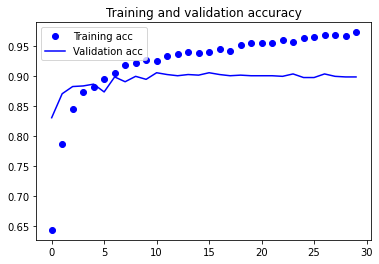

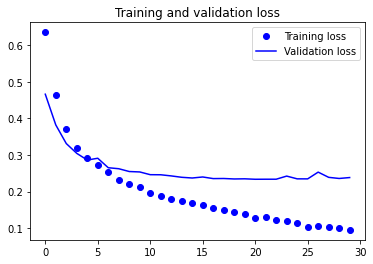

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

우리는 작은 모델을 처음부터 훈련시켜 이전 섹션에서 달성 할 수 있었던 것보다 훨씬 나은 약 90% 정도의 유효성 정확도에 도달했습니다. 그러나 우리의 플롯은 또한 상당히 큰 비율로 드롭 아웃을 사용 했음에도 불구하고 학습 모델이 처음부터 과적합하고 있음을 나타냅니다. 이는 이 기술이 작은 이미지 데이터 세트로 과적 합을 방지하는 데 필수적인 Data Augmentation을 활용하지 않기 때문입니다.

이제 훨씬 더 느리고 비용이 많이 들지만 학습 중에 Data Augmentation을 활용할 수 있는 feature extraction을 수행하기 위해 언급 한 두 번째 기술을 검토해 보겠습니다. 이 기술은 사실 계산량이 굉장히 많아서 GPU에 액세스 할 수 있는 경우에만 시도해야합니다. CPU에서는 다루기 어렵습니다. GPU에서 코드를 실행할 수 없다면 이전 기술을 사용하는 것이 좋습니다.

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

우리가 사용하는 모델은 다음과 같습니다:

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


모델을 컴파일하고 훈련하기 전에 해야 할 매우 중요한 일은 convolution base의 파라미터들을 고정하는 것입니다. 레이어 또는 레이어 집합을 "고정"한다는 것은 훈련 중에 가중치가 업데이트되지 않도록 하는 것을 의미합니다. 이렇게하지 않으면 이전에 convolutional base에서 학습한 표현이 훈련 중에 수정됩니다. 상단의 Dense 레이어는 무작위로 초기화되기 때문에 매우 큰 가중치 업데이트가 네트워크를 통해 전파되면 이전에 학습한 representation을 파괴합니다. 경우에 따라서는 이를 고정하지 않고, 학습률을 달리해서 (아래쪽 layer들은 작은 learning rate, 위쪽 layer들은 큰 learning rate) 적용하는 것이 효과적인 경우도 있습니다.

In [15]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [16]:
conv_base.trainable = False

In [17]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


이 설정을 사용하면 추가 한 두 Dense 레이어의 가중치만 학습됩니다. 이것은 총 4 개의 가중치 텐서입니다: 레이어 당 2 개 (주 가중치 행렬과 bias 벡터). 이러한 변경 사항을 적용하려면 먼저 모델을 컴파일해야합니다. 컴파일 후 가중치 훈련 가능성을 수정 한 경우 모델을 다시 컴파일해야합니다. 그렇지 않으면 이러한 변경 사항이 무시됩니다.

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/30
100/100 [==============================] - 21s 202ms/step - loss: 0.5897 - acc: 0.6845 - val_loss: 0.4569 - val_acc: 0.8120
Epoch 2/30
100/100 [==============================] - 20s 200ms/step - loss: 0.4821 - acc: 0.7825 - val_loss: 0.3710 - val_acc: 0.8600
Epoch 3/30
100/100 [==============================] - 28s 278ms/step - loss: 0.4329 - acc: 0.8095 - val_loss: 0.3314 - val_acc: 0.8720
Epoch 4/30
100/100 [==============================] - 20s 199ms/step - loss: 0.4036 - acc: 0.8130 - val_loss: 0.3145 - val_acc: 0.8760
Epoch 5/30
100/100 [==============================] - 20s 201ms/step - loss: 0.3917 - acc: 0.8255 - val_loss: 0.2967 - val_acc: 0.8850
Epoch 6/30
100/100 [==============================] - 20s 198ms/step - loss: 0.3690 - acc: 0.8370 - val_loss: 0.2850 - val_acc: 0.8930
Epoch 7/30
100/100 [==============================] - 21s 207ms/step - loss: 0.3536 - acc: 0.8495 - val_loss: 0.2757 - val_acc: 0.8950
Epoch 8/30
100/100 [==============================] - 2

In [19]:
model.save('/content/drive/My Drive/Model/cats_and_dogs_small_3.h5')

결과들을 그래프로 나타내면 다음과 같습니다:

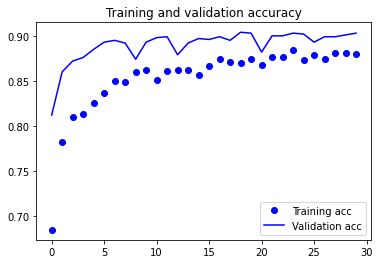

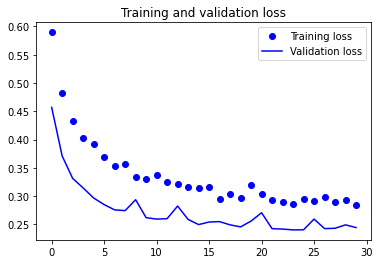

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

결과를 보면 90% 초반대의 정확도가 나오고 작은 convnet을 처음부터 학습시킬 때보다 훨씬 좋은 결과를 보임을 알 수 있습니다.

## Fine-tuning

특징 추출을 보완하는 모델 재사용을 위해 널리 사용되는 또 다른 기술은 fine tuning입니다. fine tuning은 feature extraction에 사용되는 고정 된 모델 기반의 최상위 레이어 몇 개를 고정 해제하고 모델의 새로 추가 된 부분 (이 경우에는 완전히 연결된 분류기)과 이러한 최상위 레이어를 모두 공동 학습하는 것으로 구성됩니다. 이를 "미세 조정"이라고합니다. 재사용되는 모델의 feature extraction 부분을 약간 조정하여 당면한 문제와 더 관련이 있는 feature들이 계산되도록 조정합니다.

![fine-tuning VGG16](https://s3.amazonaws.com/book.keras.io/img/ch5/vgg16_fine_tuning.png)

위에서 무작위로 초기화 된 분류기를 훈련시킬 수 있으려면 VGG16의 convolution base를 고정해야 한다고 이전에 언급했습니다. 같은 이유로, 위에 있는 분류기가 이미 훈련된 후에 convolution base의 최상위 레이어를 미세 조정할 수 있습니다. 분류기가 아직 훈련되지 않은 경우 훈련 중에 네트워크를 통해 전파되는 오류 신호가 너무 커서 fine tuning 중인 계층에서 이전에 학습 한 representation이 파괴됩니다. 따라서 네트워크를 미세 조정하는 단계는 다음과 같습니다.

* 1) 기존에 학습된 네트워크 위에 새로운 분류기를 추가
* 2) base network를 고정
* 3) 새롭게 추가한 부분을 학습
* 4) base network의 윗 부분 중 일부를 고정 해제
* 5) 사용자가 새롭게 추가한 부분과 해제한 부분을 함께 학습

In [21]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     


우리는 마지막 3개의 convolutional layer들을 학습시킵니다. 다른 표현으로 'block4_pool' 이전까지는 고정시키고 그 이후 layer들을 학습시킵니다.

왜 더 많은 layer들을 학습시키지 않을까요? 전체의 convolution base를 재학습시키면 어떨까요? 우리는 할 수 있지만 다음의 요소들을 생각해 봐야 합니다:

* 초기 layer들은 좀 더 일반적이고 재사용 가능한 feature extraction을 학습한 상황입니다. 그리고 상위 layer로 갈 수록 좀 더 응용 분야에 집중된 feature extraction 과정을 학습하게 됩니다. 낮은 layer들을 학습시키게 되면 효과가 적을 수 있습니다.

* 좀 더 많은 수의 파라미터를 학습시킬 수록 과적합의 위험성도 올라가게 됩니다. convolution base는 1500만개의 파라미터를 가지고 있습니다. 데이터 수에 비해 굉장히 많은 수의 파라미터입니다.

따라서 우리 상황에서는 상위 2, 3개 레이어들만 재학습시키는 것이 적절합니다.

In [22]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

Now we can start fine-tuning our network. We will do this with the RMSprop optimizer, using a very low learning rate. The reason for using 
a low learning rate is that we want to limit the magnitude of the modifications we make to the representations of the 3 layers that we are 
fine-tuning. Updates that are too large may harm these representations.

이제 우리는 fine tuning을 할 수 있습니다. RMSprop optimizer를 이용해서 매우 낮은 learning rate으로 학습시킵니다. 작은 learning rate을 사용하는 이유는 convbase의 상위 layer들이 학습한 내용들을 너무 빨리 변화시키지 않기 위함입니다. 너무 크게 업데이트를 할 경우 해당 layer들이 학습하고 있는 representation을 손상시킬 수 있습니다.

In [23]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


100/100 [==============================] - 23s 215ms/step - loss: 0.3146 - acc: 0.8675 - val_loss: 0.2500 - val_acc: 0.8940
Epoch 2/100
100/100 [==============================] - 24s 244ms/step - loss: 0.2564 - acc: 0.8890 - val_loss: 0.2036 - val_acc: 0.9170
Epoch 3/100
100/100 [==============================] - 20s 204ms/step - loss: 0.2354 - acc: 0.8965 - val_loss: 0.2002 - val_acc: 0.9220
Epoch 4/100
100/100 [==============================] - 21s 205ms/step - loss: 0.2306 - acc: 0.9065 - val_loss: 0.2159 - val_acc: 0.9110
Epoch 5/100
100/100 [==============================] - 20s 204ms/step - loss: 0.2112 - acc: 0.9160 - val_loss: 0.2146 - val_acc: 0.9150
Epoch 6/100
100/100 [==============================] - 21s 207ms/step - loss: 0.2112 - acc: 0.9120 - val_loss: 0.2866 - val_acc: 0.8890
Epoch 7/100
100/100 [==============================] - 22s 220ms/step - loss: 0.1670 - acc: 0.9320 - val_loss: 0.2279 - val_acc: 0.9150
Epoch 8/100
100/100 [==============================] - 20s 2

In [24]:
model.save('/content/drive/My Drive/Model/cats_and_dogs_small_3.h5')

우리의 학습 결과를 그래프로 표현하면 다음과 같습니다.

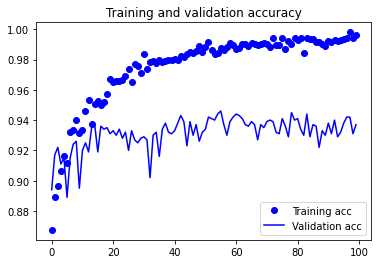

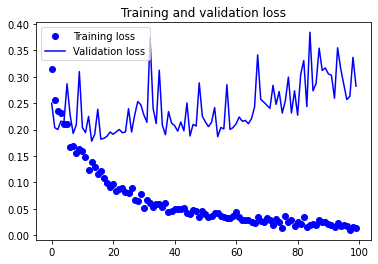

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

해당 그래프는 굉장히 노이지 합니다. 좀 더 잘 볼 수 있게 curve들을 smoothing합니다. 이동지수평균법을 이용해서 smoothing합니다.

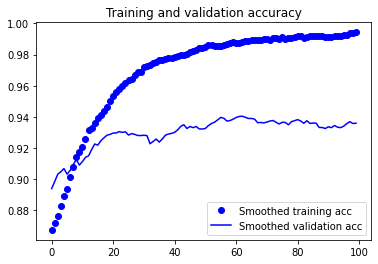

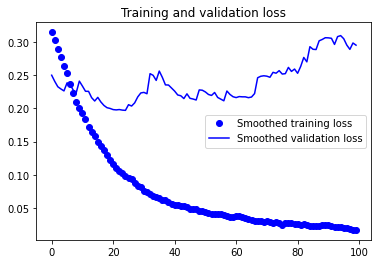

In [26]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


우리는 3% 정도의 성능 향상을 확인할 수 있습니다.

검증 데이터에 적용해보면 다음과 같습니다:

In [27]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 4s 74ms/step - loss: 0.3578 - acc: 0.9370
test acc: 0.9369999766349792


MobileNet version 2를 이용한 Transfer Learning 

In [28]:
from tensorflow.keras.applications import MobileNetV2

conv_base = MobileNetV2(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3))

conv_base.summary()

conv_base.trainable = True


9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReL

In [31]:

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block_12_expand':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1)

Epoch 1/50
100/100 [==============================] - 23s 194ms/step - loss: 0.2908 - acc: 0.8780 - val_loss: 0.0848 - val_acc: 0.9700
Epoch 2/50
100/100 [==============================] - 18s 184ms/step - loss: 0.1982 - acc: 0.9200 - val_loss: 0.1612 - val_acc: 0.9480
Epoch 3/50
100/100 [==============================] - 20s 197ms/step - loss: 0.1744 - acc: 0.9315 - val_loss: 0.1051 - val_acc: 0.9650
Epoch 4/50
100/100 [==============================] - 18s 185ms/step - loss: 0.1812 - acc: 0.9285 - val_loss: 0.1701 - val_acc: 0.9480
Epoch 5/50
100/100 [==============================] - 19s 185ms/step - loss: 0.1824 - acc: 0.9305 - val_loss: 0.0840 - val_acc: 0.9730
Epoch 6/50
100/100 [==============================] - 19s 186ms/step - loss: 0.1498 - acc: 0.9440 - val_loss: 0.1129 - val_acc: 0.9620
Epoch 7/50
100/100 [==============================] - 18s 183ms/step - loss: 0.1351 - acc: 0.9480 - val_loss: 0.0950 - val_acc: 0.9670
Epoch 8/50
100/100 [==============================] - 2

In [32]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

model.save('/content/drive/My Drive/Model/cats_and_dogs_small_5.h5')

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 3s 59ms/step - loss: 0.2356 - acc: 0.9570
test acc: 0.9570000171661377


우리는 95% 정도의 정확도를 얻을 수 있습니다. 과거 Kaggle의 competition에서 가장 좋은 결과들 중 하나에 해당하는 수치입니다. 그러나 deep learning 기술을 사용함으로써 우리는 굉장히 적은 수의 데이터를 가지고도 (10%) 그와 유사한 성능을 냈습니다.

## Take-aways: using convnets with small datasets

* Convnet은 computer vision 문제 해결에 탁월한 성능을 보입니다. 적은 수의 데이터를 가지고도 좋은 성능의 결과를 낼 수 있습니다.

* 작은 데이터셋에서 과적합은 중요한 문제입니다. Data augmentation은 해당 문제를 해결하는 데 굉장히 효과적입니다.

* 기존에 학습된 convnet을 활용하여 새로운 데이터 문제를 해결하는 것은 어렵지 않습니다. 작은 데이터셋 문제를 해결하는 데 있어서 굉장히 중요한 접근 방법입니다.

feature extraction을 사용할 수도 있고, fine-tuning을 활용할 수도 있습니다. 모두 다 기존에 학습된 모델을 활용하는 효과적인 방법들입니다.